Importing the dependencies

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data Collection And Analysis 



PIMA Diabetes Dataset

In [2]:
#loading the diabetes dataset to a pandas DataFrame 
diabetes_dataset = pd.read_csv(r"C:\Users\Piyush Singh\Downloads\diabetes.csv.csv")

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#number of rows and columns in this dataset 
diabetes_dataset.shape

(768, 9)

In [6]:
#getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0----> Non-Diabetic



1---->Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# eperating the data and labels
x = diabetes_dataset.drop(columns = 'Outcome', axis =1)
y = diabetes_dataset['Outcome']

In [10]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standirazation

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit

<bound method StandardScaler.fit of StandardScaler()>

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)  # Replace 'x' with your dataset
standarized_data = scaler.transform(x)


In [15]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
x = standarized_data
y = diabetes_dataset['Outcome']

In [17]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [18]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2 , stratify=y,random_state=2)

In [19]:
print(x.shape , x_train.shape , x_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [20]:
classifier = svm.SVC(kernel='linear')

In [21]:
#training the support vector machine classifier 
classifier.fit(x_train , y_train)

SVC(kernel='linear')

Model Evaluation                         

Accuracy Score

In [22]:
#accuracy score on the training data 
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction , y_train)

In [23]:
print('Accuracy Score of training data : ', training_data_accuracy)

Accuracy Score of training data :  0.7866449511400652


In [24]:
#accuracy score on the testdata 
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction , y_test)

In [25]:
print('Accuracy Score of testing data : ', testing_data_accuracy)

Accuracy Score of testing data :  0.7727272727272727


Making Predictive system 

In [26]:
input_data= (3,78,50,32,88,31,0.248,26)

#changing the input into numpy array 

input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting the one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standarized the input data 
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
   print("The person is not diabetic")
else :
   print("The Person is diabetic ")

[[-0.25095213 -1.34247638 -0.98770975  0.71908574  0.07120427 -0.12597727
  -0.676133   -0.61611067]]
[0]
The person is not diabetic


c:\Users\Piyush Singh\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SAVING THE TRAINED MODEL 

In [27]:
import pickle

In [30]:
file_name = 'diabetesprediction.sav'
pickle.dump (classifier,open(file_name,'wb'))

In [31]:
#loading the saved model
loaded_model = pickle.load(open('diabetesprediction.sav','rb'))

In [32]:
input_data= (3,78,50,32,88,31,0.248,26)

#changing the input into numpy array 

input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting the one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standarized the input data 
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction =loaded_model.predict(std_data)
print(prediction)

if(prediction[0]==0):
   print("The person is not diabetic")
else :
   print("The Person is diabetic ")

[[-0.25095213 -1.34247638 -0.98770975  0.71908574  0.07120427 -0.12597727
  -0.676133   -0.61611067]]
[0]
The person is not diabetic


c:\Users\Piyush Singh\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


CONFUSION MATRIX 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(y_test , x_test_prediction)

print(cf_matrix)

[[91  9]
 [26 28]]


In [ ]:
tn,fp,fn,tp = cf_matrix.ravel()

print(tn,fp,fn,tp)

91 9 26 28


<Axes: >

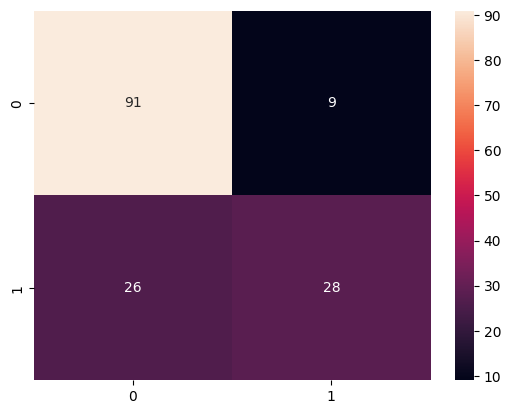

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)